In [1]:
import SVMClassifier as svm
import PCA as pca
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Kernel
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filepath = '../challenge-dataset/'

In [3]:
#BASIC TEST

kernel_svm = Kernel.Kernel(lambda x,y :(x.T)@y)
lam = 1

inputs = np.array([
                    [-1,1],
                    [1/2,1],
                    [1/2,2],
                    [-2,2],
                    [-1,5/2],
                    [1/2,-1],
                    [1/2,-2],
                    [-1/2, 3/2],
                    [2,1/2],
                    [5/2,3/2]   
])
labels = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])

Kernel Matrix computed (10, 10)
SOLVE BEGINS
-1.0358170036969279


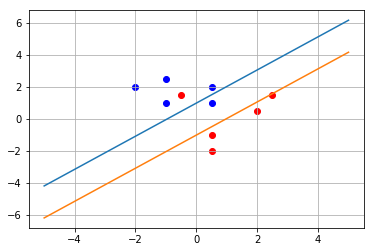

In [4]:
svmClassifier = svm.SVMClassifier(lam = lam, kernel = kernel_svm)
svmClassifier.fit(inputs, labels.astype(np.double))
svmClassifier.plot_boundaries()

In [5]:
Xtr0_mat100 = pd.read_csv(filepath + 'Xtr0_mat100.csv', delimiter=' ', header = None)
Ytr0 = pd.read_csv(filepath + 'Ytr0.csv', delimiter=',', sep='\n', header = 0)

Xte0_mat100 = pd.read_csv(filepath + 'Xte0_mat100.csv', delimiter=' ', header = None)

In [6]:
def bound_normalisation(x):
    if x == 0:
        return -1
    else:
        return x

In [7]:
Ytr0['Bound'] = Ytr0['Bound'].map(bound_normalisation)

In [ ]:
print(Xtr0_mat100.values.shape)

In [18]:
inputs_al = Xtr0_mat100.values
labels_al = Ytr0.values

inputs_tr = Xtr0_mat100.values[:1000]
labels_tr = Ytr0.values[:,1][:1000]

inputs_te = Xtr0_mat100.values[1000:1100]
labels_te = Ytr0.values[:,1][1000:1100]

In [19]:
lam = 1
bandwidth = 1

def f(x,y,bandwidth):
    return np.exp(-(np.linalg.norm(x-y)/bandwidth)**2)

kernel_pca = Kernel.Kernel(lambda x,y :(x.T)@y)




In [20]:
svmClassifier = svm.SVMClassifier(lam = lam, kernel = kernel_svm)
svmClassifier.fit(inputs_tr, labels_tr.astype(np.double))
accuracy = svmClassifier.compute_test_accuracy(inputs_te, labels_te)


Kernel Matrix computed (1000, 1000)
SOLVE BEGINS


ValueError: constraints are inconsistent, no solution

In [17]:
print(accuracy)

0.54


In [ ]:
pca_agent = pca.PCA(kernel=kernel_pca)

In [ ]:
res = []
for i in ([10,20,30,40,50,60]):
    projections = pca_agent.perform_PCA(inputs_al, dim_num = i)
    inputs_tr = projections[:1900]
    labels_tr = labels_al[:1900][:,1]

    inputs_te = projections[1900:]
    labels_te = labels_al[1900:][:,1]
    svmClassifier = svm.SVMClassifier(lam = lam, kernel = kernel_svm)
    svmClassifier.fit(inputs_tr, labels_tr.astype(np.double))
    accuracy = svmClassifier.compute_test_accuracy(inputs_te, labels_te)
    res.append(accuracy)
    print(accuracy)

In [ ]:
"""
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
label_1 = projections[labels_tr==1]
label_2 = projections[labels_tr==-1]
ax.scatter(label_1[:,0], label_1[:,1], label_1[:,2], color='red')
ax.scatter(label_2[:,0], label_2[:,1], label_2[:,2] ,color= 'blue')
"""


In [ ]:
G = np.diag([5,1,2])
print(np.vstack([G,G]))
print(G)